### Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read data

In [2]:
portfolio_a_path = Path("../3.3/Resources/tech_stocks_2018_a.csv")
portfolio_b_path = Path("../3.3/Resources/tech_stocks_2018_b.csv")

portfolio_a = pd.read_csv(portfolio_a_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_b = pd.read_csv(portfolio_b_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_a.head()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2019-08-23,202.64,133.39,1151.29,177.75,1749.62
2019-08-22,212.46,137.78,1189.53,182.04,1805.60
2019-08-21,212.64,138.79,1191.25,183.55,1823.54
2019-08-20,210.36,137.26,1182.69,183.81,1801.38
2019-08-19,210.35,138.41,1198.45,186.17,1816.12


### Calculate Annualized Std Dev

In [3]:
# Calculate daily returns
portfolio_a_returns = portfolio_a.pct_change().dropna()
portfolio_b_returns = portfolio_b.pct_change().dropna()

# Concat returns into one DataFrame
all_portfolios_returns = pd.concat([portfolio_a_returns, portfolio_b_returns], axis='columns', join='inner')
all_portfolios_returns.head()

,AAPL,MSFT,GOOG,FB,AMZN,SNE,AMD,TWTR,IBM,MU
Date,,,,,,,,,,
2019-08-22,0.048460,0.032911,0.033215,0.024135,0.031996,-0.729718,-0.760852,-0.963363,-0.244332,0.042365
2019-08-21,0.000847,0.007331,0.001446,0.008295,0.009936,0.034325,-0.006270,0.014699,-0.000521,-0.013622
2019-08-20,-0.010722,-0.011024,-0.007186,0.001417,-0.012152,-0.017476,-0.030915,-0.011916,-0.009311,0.001358
2019-08-19,-0.000048,0.008378,0.013326,0.012839,0.008183,0.001078,0.024740,-0.013951,0.015338,0.017635
2019-08-16,-0.018303,-0.016473,-0.017397,-0.013267,-0.012967,0.000179,-0.009530,-0.026859,-0.009479,-0.032437


In [4]:
# Calculate Sharpe Ratio
sharpe_ratios = (all_portfolios_returns.mean() * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

AAPL    0.343003
MSFT   -0.683677
GOOG    0.308191
FB      0.095713
AMZN    0.415500
SNE    -0.859838
AMD    -0.914225
TWTR   -1.002989
IBM    -0.391053
MU      0.564906
dtype: float64

### Plot sharpe ratios

<AxesSubplot:title={'center':'Sharpe Ratios'}>

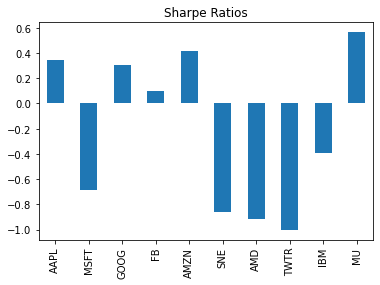

In [5]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")